In [ ]:
!pip install wittgenstein

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
import wittgenstein as lw
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn import tree

from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
#from google.colab import files
#uploaded = files.upload()

from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


1.- Import Data

In [ ]:
data = pd.read_csv("/gdrive/MyDrive/Colab Notebooks/dataset.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

2.- Data Preprocessing

In [ ]:
data.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [ ]:
data = data.dropna()
data['explicit'] = data['explicit'].astype(int)
data.head()

<ipython-input-18-283586ec3a45>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['explicit'] = data['explicit'].astype(int)


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,0,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,0,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,0,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,0,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,0,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


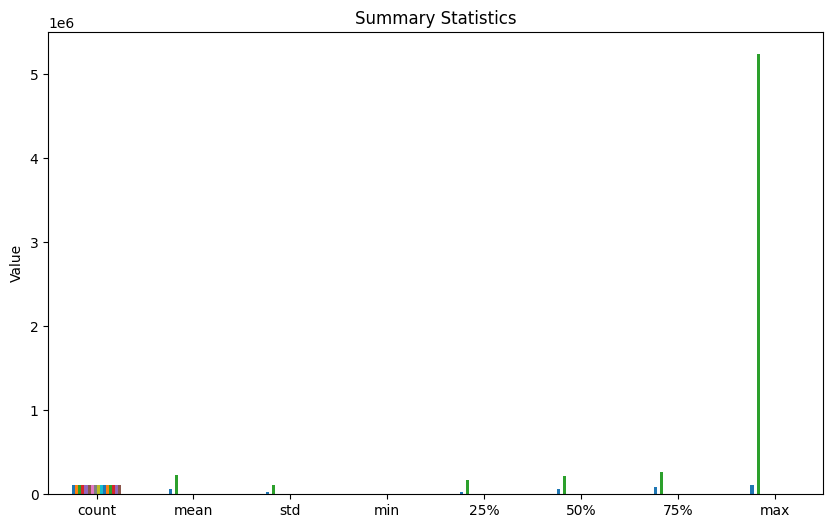

In [ ]:
data.describe()
summary = data.describe()

# Create a bar plot of the summary statistics
ax = summary.plot(kind='bar', figsize=(10, 6), legend=False)
plt.title("Summary Statistics")
plt.ylabel("Value")
plt.xticks(rotation=0)  # You can adjust the rotation as needed

# Save the plot as an image (e.g., PNG)
plt.savefig("/gdrive/MyDrive/Colab Notebooks/summary_statistics.png")

In [ ]:
data_genre = data.groupby(['track_genre']).size()
data_genre = data_genre.to_frame()
data_genre.sort_values(by=[0], ascending=False)

,0
track_genre,
acoustic,1000
afrobeat,1000
psych-rock,1000
progressive-house,1000
power-pop,1000
...,...
emo,1000
electronic,1000
electro,1000


In [ ]:
data_2 = data.drop(['Unnamed: 0', 'track_id','artists','album_name','track_name'], axis=1)

data_2['popular']=False
data_2.loc[data_2['popularity'] > 50, 'popular'] = True
data_2 = data_2.drop(['popularity'], axis=1)

data_2.loc[data_2['popular'] == 0]

,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,popular
23,216386,0,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.5150,140.182,4,acoustic,False
24,231266,0,0.796,0.667,5,-4.831,0,0.0392,0.3810,0.000000,0.2210,0.7540,97.988,4,acoustic,False
25,302346,0,0.755,0.454,9,-9.609,0,0.0352,0.7570,0.000000,0.2360,0.3300,120.060,4,acoustic,False
26,131760,0,0.620,0.309,5,-9.209,1,0.0495,0.7880,0.000000,0.1460,0.6640,145.363,4,acoustic,False
27,273653,0,0.633,0.429,4,-6.784,0,0.0381,0.0444,0.000000,0.1320,0.5200,143.793,4,acoustic,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,384999,0,0.172,0.235,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music,False
113996,385000,0,0.174,0.117,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music,False
113997,271466,0,0.629,0.329,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music,False
113998,283893,0,0.587,0.506,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music,False


2.1.- Hotencoding Key Values

In [ ]:
dummyvars = ["key","track_genre"]
data_3 = pd.get_dummies(data_2, prefix=dummyvars, columns=dummyvars, drop_first=True)
data_3 = data_3[[col for col in data_3.columns if col != 'popular'] + ['popular']]
data_3.head()

,duration_ms,explicit,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,track_genre_study,track_genre_swedish,track_genre_synth-pop,track_genre_tango,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music,popular
0,230666,0,0.676,0.4610,-6.746,0,0.1430,0.0322,0.000001,0.3580,...,0,0,0,0,0,0,0,0,0,1
1,149610,0,0.420,0.1660,-17.235,1,0.0763,0.9240,0.000006,0.1010,...,0,0,0,0,0,0,0,0,0,1
2,210826,0,0.438,0.3590,-9.734,1,0.0557,0.2100,0.000000,0.1170,...,0,0,0,0,0,0,0,0,0,1
3,201933,0,0.266,0.0596,-18.515,1,0.0363,0.9050,0.000071,0.1320,...,0,0,0,0,0,0,0,0,0,1
4,198853,0,0.618,0.4430,-9.681,1,0.0526,0.4690,0.000000,0.0829,...,0,0,0,0,0,0,0,0,0,1


3.- Exploratory Data Analysis

In [ ]:
pop_corr = data_2[data_2.columns[:]].corr()['popular'][:-1]
print(pop_corr)
print(abs(pop_corr).mean())

duration_ms        -0.040975
explicit            0.057928
danceability        0.052040
energy             -0.022273
key                -0.001432
loudness            0.034286
mode               -0.026229
speechiness        -0.049383
acousticness       -0.035401
instrumentalness   -0.081801
liveness           -0.086908
valence            -0.040239
tempo              -0.013158
time_signature      0.024892
Name: popular, dtype: float64
0.04049594017697418


<ipython-input-11-6d376b2b916e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pop_corr = data_2[data_2.columns[:]].corr()['popular'][:-1]


In [ ]:
pop_corr = data_3[data_3.columns[:]].corr()['popular'][:-1]
print(pop_corr)
print(abs(pop_corr).mean())

duration_ms               -0.040975
explicit                   0.057928
danceability               0.052040
energy                    -0.022273
loudness                   0.034286
                             ...   
track_genre_techno         0.003375
track_genre_trance        -0.007582
track_genre_trip-hop      -0.008021
track_genre_turkish       -0.043085
track_genre_world-music   -0.004295
Name: popular, Length: 137, dtype: float64
0.035079914679408915


<ipython-input-13-d51467832626>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pop_corr = data_2[data_2.columns[:]].corr()[:]


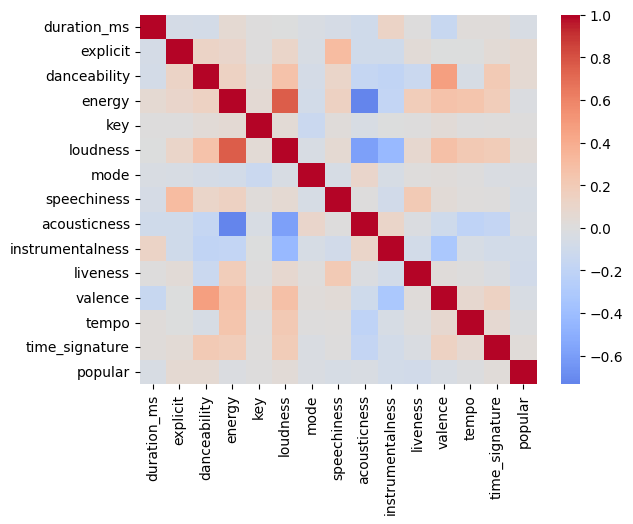

In [ ]:
pop_corr = data_2[data_2.columns[:]].corr()[:]

# Create a heatmap from the DataFrame
sns.heatmap(pop_corr, annot=False, cmap="coolwarm", center=0)

plt.show()

duration_ms
explicit
danceability
energy
key
loudness
mode
speechiness
acousticness
instrumentalness
liveness
valence
tempo
time_signature
track_genre


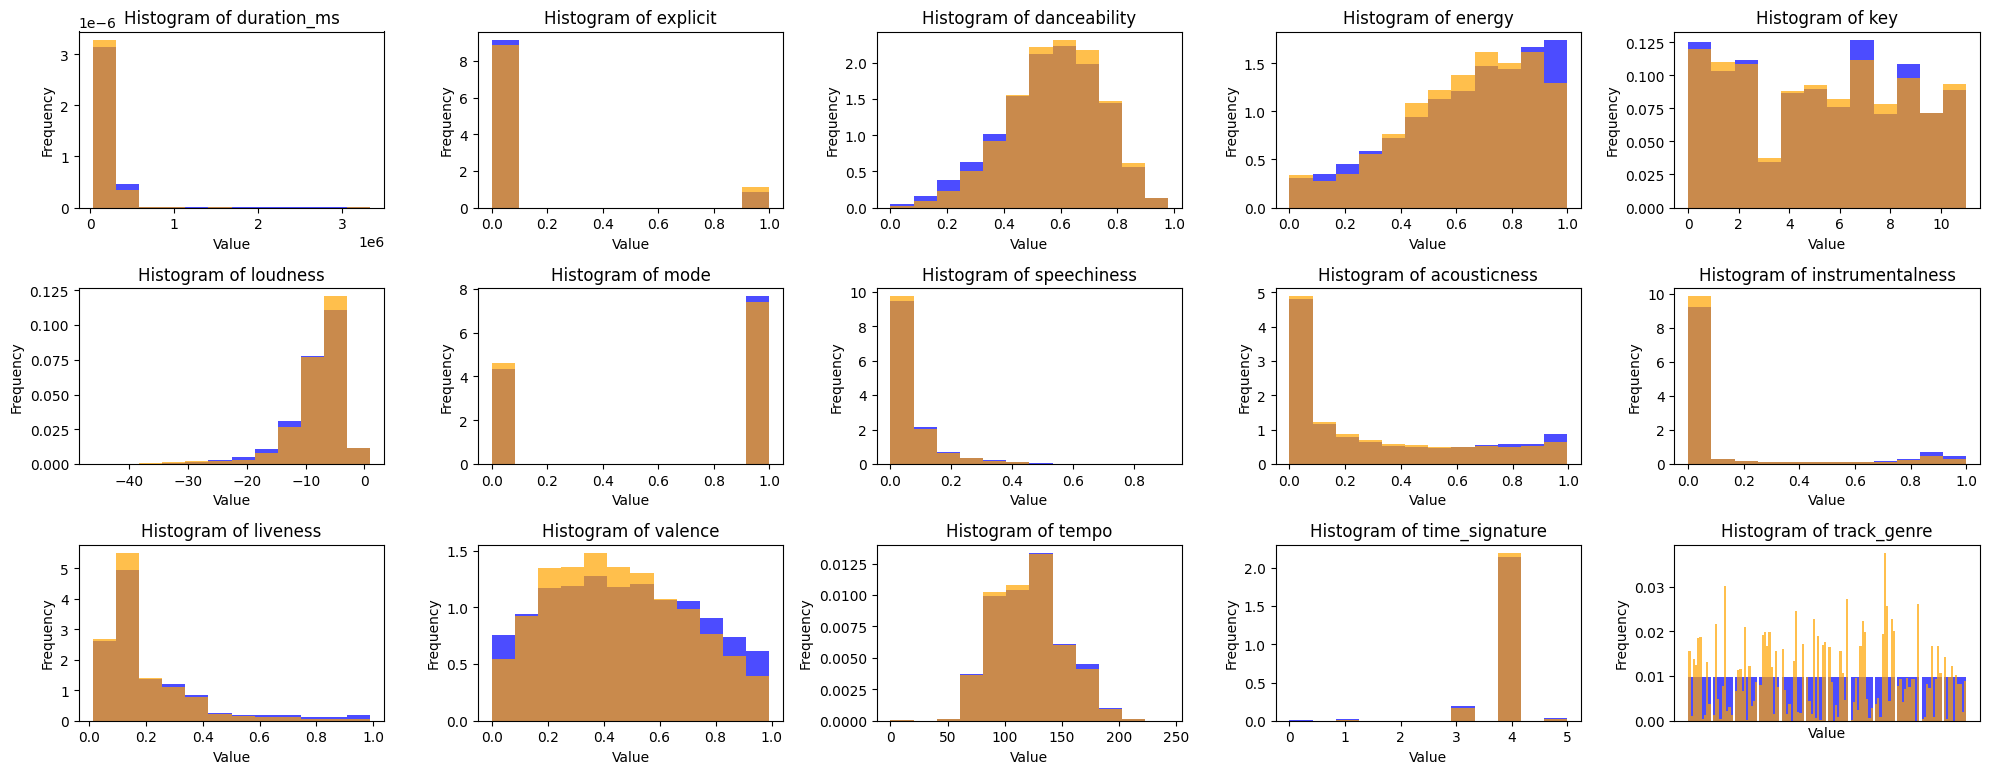

In [ ]:
pop_data = data_2[data_2['popular'] == 1]
# Define the number of rows and columns for the grid
num_rows = 3
num_cols = 5

# Create a figure and subplots for the grid
fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 8))

# Flatten the axs array to make it easier to access the individual subplots
axs = axs.ravel()

# Loop through the columns and create histograms in the grid
for i, column in enumerate(data_2.columns[:-1]):
    ax = axs[i]  # Get the current subplot
    if column=='explicit':
       ax.hist(data_2[column], color='blue', label=f'All Genres - {column}', density=True, alpha=0.7)
       ax.hist(pop_data[column], color='orange', label=f'Tango Genre - {column}', density=True, alpha=0.7)
    elif column=='track_genre':
       ax.hist(data_2[column], color='blue', label=f'All Genres - {column}', density=True, alpha=0.7, bins=125)
       ax.hist(pop_data[column], color='orange', label=f'Tango Genre - {column}', density=True, alpha=0.7,bins=125)
       ax.set_xticks([])
    else:
        bin_edges = np.histogram_bin_edges(pop_data[column], bins=12)
        ax.hist(data_2[column], color='blue', label=f'All Genres - {column}', density=True, bins=bin_edges, alpha=0.7)
        ax.hist(pop_data[column], color='orange', label=f'Tango Genre - {column}', density=True, bins=bin_edges, alpha=0.7)
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

# Remove any empty subplots (if the grid size exceeds the number of columns)
for i in range(len(data.columns), num_rows * num_cols):
    fig.delaxes(axs[i])

# Adjust the layout to avoid overlapping titles
plt.tight_layout()

# Show the plots
plt.show()

3.2.- Normalization

In [ ]:
# Putting feature variable to x
x_data = data_3.drop(['popular'],axis=1)

#Putting response variable to c
c_data = data_3['popular']

#Normalization
MinMaxScaler = preprocessing.MinMaxScaler()
x_data_norm = pd.DataFrame(MinMaxScaler.fit_transform(x_data),columns=x_data.columns)
x_data_norm.describe()
#x_data_norm.to_csv('/gdrive/My Drive/my_dataframe.csv', index=False)

Weka Data:

In [ ]:
# Select the numerical columns for normalization (exclude 'track_genre')
numerical_columns = data_2.columns.difference(['popular','track_genre'])

# Create a DataFrame with only the numerical columns
w_data = data_2[numerical_columns]

# Initialize the MinMaxScaler
MinMaxScaler = preprocessing.MinMaxScaler()

# Normalize the numerical columns
w_data_norm = pd.DataFrame(MinMaxScaler.fit_transform(w_data), columns=w_data.columns)

# Concatenate the normalized numerical columns with the 'track_genre' column
w_data_norm = pd.concat([w_data_norm, data_2['track_genre'],data_2['popular']], axis=1)
w_data_norm=w_data_norm.dropna()
w_data_norm.head()
w_data_norm.isnull().sum()
w_data_norm.to_csv("/gdrive/My Drive/Colab Notebooks/clean_data.csv", index=False)

In [ ]:

data_2.to_csv("/gdrive/My Drive/Colab Notebooks/notnorm_data.csv", index=False)

WRAPPERS


In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector



In [ ]:
# Putting feature variable to x
x_data = w_data

#Putting response variable to c
c_data = data_2['popular']
knn = KNeighborsClassifier(n_neighbors=10)
sfs = SequentialFeatureSelector(knn, n_features_to_select=10)
sfs.fit(x_data, c_data)

SequentialFeatureSelector(estimator=KNeighborsClassifier(n_neighbors=10),
                          n_features_to_select=10)

In [ ]:
sfs.get_support()

array([ True,  True,  True, False,  True,  True, False,  True, False,
        True,  True, False,  True,  True])

In [ ]:
x_data.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy', 'explicit',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')

In [ ]:
clf = MLPClassifier(random_state=1, max_iter=200)
sfsm = SequentialFeatureSelector(clf, n_features_to_select=7)
sfsm.fit(x_data, c_data)
sfsm.get_support()

3.3.- Training and Testing Sets

In [ ]:
# Split into training and test set
x_train, x_test, y_train, y_test = train_test_split(x_data_norm, c_data, test_size=0.2, random_state = 1)

4.- K-NN Classifier

In [ ]:
knn_clf=KNeighborsClassifier()
knn_clf.fit(x_train,y_train)

ypred=knn_clf.predict(x_test) #These are the predicted output values

In [ ]:
result1 = classification_report(y_test, ypred)
print('Classification Report:',)
print (result1)
result2 = accuracy_score(y_test,ypred)
print('Accuracy:',result2)

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86     17185
           1       0.57      0.45      0.50      5615

    accuracy                           0.78     22800
   macro avg       0.70      0.67      0.68     22800
weighted avg       0.77      0.78      0.77     22800

Accuracy: 0.7803947368421053


Confusion Matrix:
[[15255  1930]
 [ 3077  2538]]


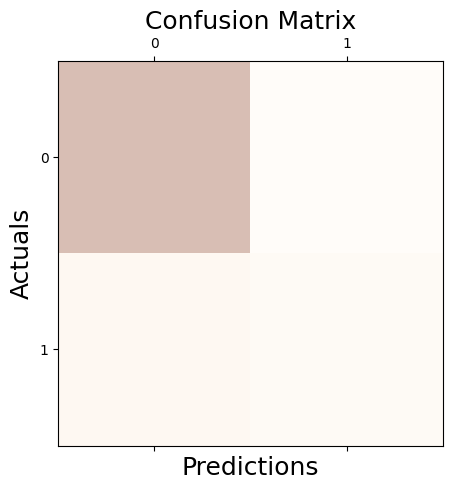

In [ ]:
conf_matrix = confusion_matrix(y_test, ypred)
print('Confusion Matrix:')
print(conf_matrix)

# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

5.- Rule Induction

In [ ]:
ripper_clf = lw.RIPPER()
ripper_clf.fit(x_train,y_train,pos_class=1)

In [ ]:
ripper_clf.out_model()

[[track_genre_pop-film=1.0] V
[explicit=1.0 ^ track_genre_emo=1.0 ^ duration_ms=<0.025] V
[explicit=1.0 ^ track_genre_sad=1.0] V
[track_genre_chill=1.0] V
[track_genre_k-pop=1.0 ^ instrumentalness=<4.1e-06 ^ acousticness=0.008-0.031] V
[track_genre_pop=1.0 ^ acousticness=0.49-0.7 ^ instrumentalness=<4.1e-06 ^ key_6=0.0] V
[explicit=1.0 ^ track_genre_comedy=0.0 ^ track_genre_emo=1.0 ^ duration_ms=0.025-0.03 ^ instrumentalness=<4.1e-06 ^ danceability=>0.79] V
[track_genre_k-pop=1.0 ^ instrumentalness=<4.1e-06 ^ time_signature=0.8 ^ acousticness=0.031-0.084 ^ key_11=0.0] V
[explicit=1.0 ^ track_genre_comedy=0.0 ^ track_genre_emo=1.0 ^ valence=0.22-0.31 ^ key_2=0.0] V
[track_genre_grunge=1.0 ^ key_1=1.0 ^ loudness=>0.85] V
[time_signature=0.8 ^ explicit=1.0 ^ track_genre_metalcore=1.0 ^ danceability=0.49-0.54 ^ acousticness=<0.00094] V
[track_genre_grunge=1.0 ^ danceability=<0.33] V
[mode=0.0 ^ track_genre_hip-hop=1.0 ^ explicit=0.0 ^ key_3=0.0 ^ tempo=0.34-0.39] V
[time_signature=0.8 ^ ex

In [ ]:
precision = ripper_clf.score(x_test, y_test, precision_score)
recall = ripper_clf.score(x_test, y_test, recall_score)
print(f'precision: {precision} recall: {recall}')

precision: 0.7937310414560161 recall: 0.13980409617097062


6.- Artificial Neural Network

In [ ]:
clf = MLPClassifier(random_state=1, max_iter=300).fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
clf.score(x_test, y_test)

0.786359649122807

In [ ]:
ypred=knn_clf.predict(x_test) #These are the predicted output values
result1 = classification_report(y_test, ypred)
print('Classification Report:',)
print (result1)
result2 = accuracy_score(y_test,ypred)
print('Accuracy:',result2)

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86     17185
           1       0.57      0.45      0.50      5615

    accuracy                           0.78     22800
   macro avg       0.70      0.67      0.68     22800
weighted avg       0.77      0.78      0.77     22800

Accuracy: 0.7803947368421053


7.- SVM

In [ ]:
clf = svm.SVC()
clf.fit(x_train, y_train)

SVC()

In [ ]:
clf.score(x_test, y_test)
ypred=knn_clf.predict(x_test) #These are the predicted output values
result1 = classification_report(y_test, ypred)
print('Classification Report:',)
print (result1)
result2 = accuracy_score(y_test,ypred)
print('Accuracy:',result2)

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86     17185
           1       0.57      0.45      0.50      5615

    accuracy                           0.78     22800
   macro avg       0.70      0.67      0.68     22800
weighted avg       0.77      0.78      0.77     22800

Accuracy: 0.7803947368421053


8.-Decision Trees

In [ ]:
clf = tree.DecisionTreeRegressor()
clf = clf.fit(x_train, y_train)

In [ ]:
clf.score(x_test, y_test)
ypred=knn_clf.predict(x_test) #These are the predicted output values
result1 = classification_report(y_test, ypred)
print('Classification Report:',)
print (result1)
result2 = accuracy_score(y_test,ypred)
print('Accuracy:',result2)

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86     17185
           1       0.57      0.45      0.50      5615

    accuracy                           0.78     22800
   macro avg       0.70      0.67      0.68     22800
weighted avg       0.77      0.78      0.77     22800

Accuracy: 0.7803947368421053
